This is to iterate over clean and noisy clips to compare them and find the biggest contrast for training

In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
from IPython.display import Audio, display
import numpy as np

import os
import time
import cmath

In [22]:
# Constants and settings
DTYPE = 'float32'

# Number of all zero samples between clips
# TODO - not using pads at all, on assumption that the samples have a bit of buffer at start and end
#PAD_SIZE = 10

# stft values
N_FFT = 1024 # 512 recommended for speech, music typically 2048
FFT_BINS = 513

# cqt values
#FFT_BINS = 768 # function of items below
HOP_LENGTH = 256

BINS_PER_OCTAVE = 12 * 8
FMIN = librosa.note_to_hz('C1')
OCTAVES = 8

In [50]:
def get_ft(wav):
    #c = librosa.cqt(wav, hop_length=HOP_LENGTH, fmin=FMIN, n_bins=OCTAVES*BINS_PER_OCTAVE, bins_per_octave=BINS_PER_OCTAVE)
    c = librosa.stft(wav, hop_length=HOP_LENGTH, n_fft=N_FFT)
    return c

def get_ft_from_file(file):
    filename = os.fsdecode(file)
    wav, rate = librosa.core.load(filename)
    return get_ft(wav)

def inv_ft(ft):
    #return librosa.icqt(ft, hop_length=HOP_LENGTH, fmin=FMIN, bins_per_octave=BINS_PER_OCTAVE)
    return librosa.istft(ft, hop_length=HOP_LENGTH)
    
# This is an approximation - much better ways to compare voice quality exist, but this works fine
def diff_ft(ft1, ft2):
    per_sample = np.sum(abs(ft1-ft2), axis=0)
    return np.average(per_sample)

def display_fft(ft):
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(ft), ref=np.max), y_axis='cqt_hz', x_axis='time')

def draw(wav):
    fft = get_ft(wav)
    display_fft(fft)
    return fft

Clean
(513, 150)
16.350368


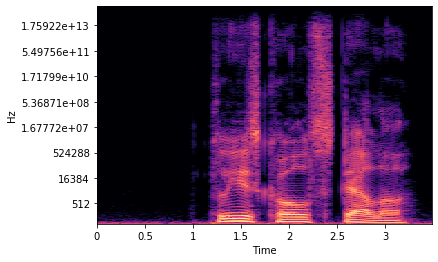

In [51]:
# some test data to hack around with
file = "p232_001.wav"
clean_file = "Assets\\DataShareArchive\\Test\\Clean\\" + file
noisy_file = "Assets\\DataShareArchive\\Test\\Noisy\\" + file
wav, rate = librosa.core.load(clean_file)
noisy_wav, rate = librosa.core.load(noisy_file)

clean_ft = get_ft(wav)
noisy_ft = get_ft(noisy_wav)

print("Clean")
print(clean_ft.shape)
display_fft(clean_ft)

print(diff_ft(clean_ft,noisy_ft))
Audio(wav, rate=rate)

Noisy
(513, 150)


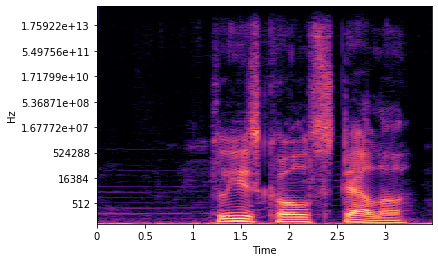

In [52]:
print("Noisy")
print(noisy_ft.shape)
display_fft(noisy_ft)
Audio(noisy_wav, rate=rate)

In [58]:
# Iterate over clean & noisy folders to create frames and targets
def compare_files(wav_root, min_diff = 150):
    clean_dir = wav_root + "\\Clean\\"
    noisy_dir = wav_root + "\\Noisy\\"
    file_list = os.listdir(clean_dir)
    file_index = 0
    while (file_index < len(file_list)) :
        file = file_list[file_index]
        noisy_ft = get_ft_from_file(noisy_dir + file)
        clean_ft = get_ft_from_file(clean_dir + file)
        diff = diff_ft(clean_ft, noisy_ft)
        if (diff > min_diff):
            print(file, diff)
        file_index += 1
    return frames, targets


In [59]:
# small test data "Assets\\DataShareArchive\\Test"
# 28K "F:\\Audiodata\\Train28Spk"
compare_files("Assets\\DataShareArchive\\Test")

p232_010.wav 255.10405
p232_032.wav 272.7092
p232_036.wav 181.75201
p232_044.wav 202.59595
p232_052.wav 287.47137
p232_056.wav 212.78235
p232_072.wav 175.46912
p232_092.wav 192.95735
p232_095.wav 197.75601
p232_096.wav 252.29623
p232_113.wav 241.2806
p232_117.wav 172.9402
p232_155.wav 188.50992
p232_160.wav 316.75772
p232_170.wav 153.46725
p232_178.wav 178.22438
p232_182.wav 192.53448
p232_203.wav 297.80472
p232_225.wav 159.53627
p232_242.wav 297.49313
p232_263.wav 204.72891
p232_267.wav 162.39523
p232_279.wav 189.22469
p232_283.wav 261.26437
p232_302.wav 161.62022
p232_303.wav 153.56815
p232_308.wav 254.35487
p232_324.wav 168.83102
p232_328.wav 169.92789
p232_344.wav 157.73953
p232_365.wav 170.37184
p232_369.wav 154.49371
p232_386.wav 262.73428
p232_390.wav 151.58208
p232_399.wav 159.05385
p232_407.wav 257.1472
p232_414.wav 151.14166
p232_415.wav 204.1704
p257_009.wav 189.04355
p257_050.wav 242.54947
p257_070.wav 179.76877
p257_090.wav 241.00594
p257_094.wav 152.63934
p257_110.wav 153

NameError: name 'frames' is not defined